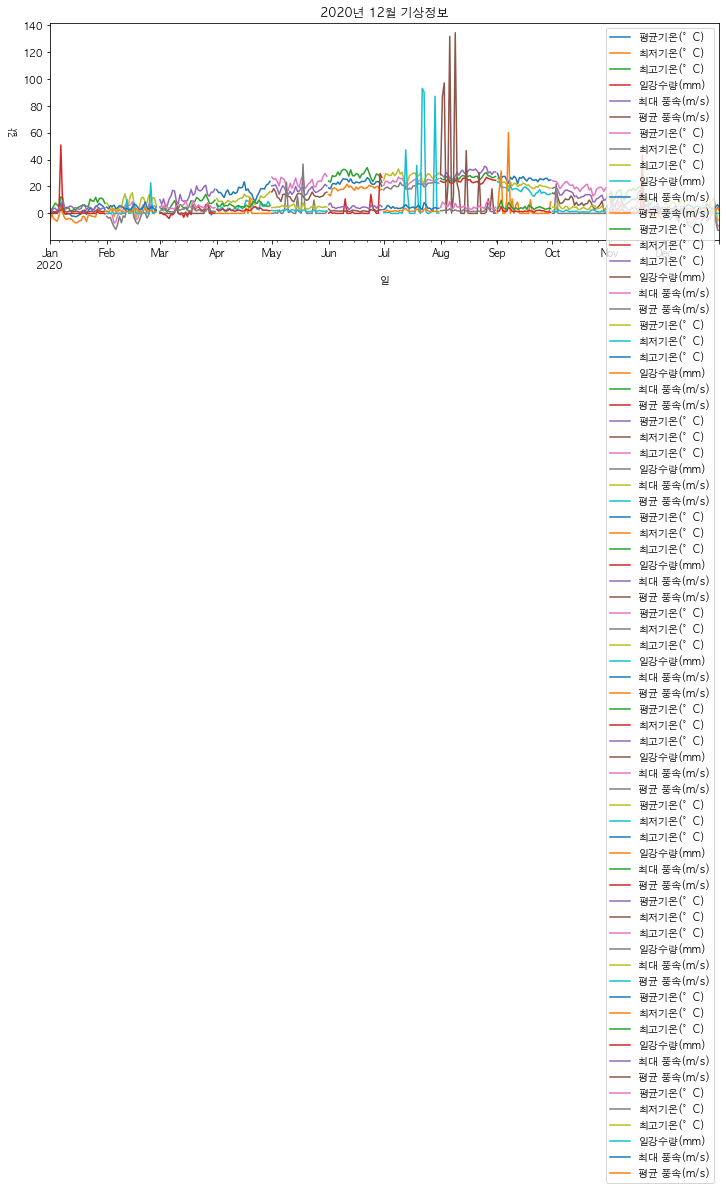

In [17]:
import pandas as pd
import tqdm
# 날짜별로 강수량 그래프로 표시하기
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
%matplotlib inline
warnings.filterwarnings(action = 'ignore')  # 에러메세지 처리
rc('font', family = 'AppleGothic')  # 한글폰트 설정

# 클래스로 리팩토링
class Weather_2020:
    # PATH_SRC = 'coding_TIL/TIL_2021/210426_데이터셋_2020년 기온 데이터_강수량 프로젝트.csv'
    # 월별 기간 딕셔너리
    dic_month_term = {
        '1월': ['2020-01-01', '2020-01-31'],
        '2월': ['2020-02-01', '2020-02-28'],
        '3월': ['2020-03-01', '2020-03-31'],
        '4월': ['2020-04-01', '2020-04-30'],
        '5월': ['2020-05-01', '2020-05-31'],
        '6월': ['2020-06-01', '2020-06-30'],
        '7월': ['2020-07-01', '2020-07-31'],
        '8월': ['2020-08-01', '2020-08-31'],
        '9월': ['2020-09-01', '2020-09-30'],
        '10월': ['2020-10-01', '2020-10-31'],
        '11월': ['2020-11-01', '2020-11-30'],
        '12월': ['2020-12-01', '2020-12-31']}
    
    def __init__(self, path_src, ):
        self.path_src = path_src

    def make_df_rain(self):
        df = pd.read_csv(self.path_src, encoding='cp949')
        # 원하는 칼럼만 추출 df[[,,,]]
        df = df[['일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
                 '일강수량(mm)', '최대 풍속(m/s)', '평균 풍속(m/s)']]
        return df

    def count_rain_day(self):
        df = self.make_df_rain()
        rain_amount = input('얼마이상의 강수량의 날을 알고 싶으세요? ')
        # 2020년 비가 온날 카운트하기
        day_rain = df.loc[df['일강수량(mm)'] > int(rain_amount)]
        print(f'2020년에 {rain_amount}mm이상 비가 온날은 {len(day_rain)}일 입니다.')

    def get_riding_dist(self):
        df = self.make_df_rain()
        rain_amount = input('얼마 이상의 강수량의 날을 알고 싶으세요? ')
        # 2020년 비가 온날 카운트하기
        day_rain = df.loc[df['일강수량(mm)'] > int(rain_amount)]
        print(f'2020년에 자전거를 {(365 - len(day_rain)) * 14}km를 탔습니다.')
        
    def make_preprocessing(self):
        df = self.make_df_rain()
        df['일시'] = pd.to_datetime(df['일시'])  # 일시 시계열 데이터로 변환하기
        df = df.set_index(['일시'])  # 날짜를 인덱스로 바꾸기
        df['일강수량(mm)'] = df['일강수량(mm)'].fillna(0)   # 강수량 결측치 0으로 바꾸기
        return df

    # 날짜별로 평균기온 그래프로 표시하기
    def draw_graph(self, p_df, p_month):
        title = f'2020년 {str(p_month)} 기상정보'
        lst_col = list(p_df.columns)
        month = p_df.loc[dic_month_term[p_month][0]:dic_month_term[p_month][1]]
        for i in lst_col:
            month[i].plot(figsize=(12, 4))
            plt.legend(loc = 'upper right') 
            plt.xlabel('일')
            plt.ylabel('값')
            plt.title(title)
        plt.savefig(title + '.png')
#         plt.show()
    
    def get_graph_rain(self):
        # 월별 강수량 그래프 출력
        df = self.make_preprocessing()

        for i in self.dic_month_term.keys():
            self.draw_graph(df, i)
        
# 데이터 파일 명
PATH_SRC = '210426_데이터셋_2020년 기온 데이터_강수량 프로젝트.csv'

weather = Weather_2020(PATH_SRC)
weather.get_graph_rain() # 월별 기상정보 그래프 이미지 파일 만들기
# weather.count_rain_day() # 2020년 비온날 계산
# weather.get_riding_dist()  # 2020년 자전거 탄날 계산

